# Problem Set 1 :

### You are hired by one of the leading news channel CNBE, who wants to analyse recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting over all win and seats covered by particular party.

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [159]:
print(" The summary of the various features of dataset is as follows :")
data_summary = pd.read_excel("Election_Data.xlsx",sheet_name=0)
data_summary

 The summary of the various features of dataset is as follows :


,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [160]:
data1 = pd.read_excel("Election_Data.xlsx",sheet_name=1)

In [161]:
data1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [162]:
data1 = data1.drop("Unnamed: 0",axis=1)

In [163]:
data1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [164]:
data_KNN_NB = data1.copy()

In [165]:
data_KNN_NB.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [166]:
print("Total number of rows and columns present in this dataset is :", data1.shape)
print("Total number of elements present in the dataset is :", data1.size)

Total number of rows and columns present in this dataset is : (1525, 9)
Total number of elements present in the dataset is : 13725


In [167]:
print('''The .info on data will provide information like shape,size,number of null values 
and data type of all the features present in the data set : \n''')
data1.info()

The .info on data will provide information like shape,size,number of null values 
and data type of all the features present in the data set : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [168]:
data1.duplicated().sum()

8

In [169]:
print("shape of the dataset before removing the duplicates :", data1.shape)
data1.drop_duplicates(inplace=True)
print("shape of the dataset after removing the duplicates :", data1.shape)

shape of the dataset before removing the duplicates : (1525, 9)
shape of the dataset after removing the duplicates : (1517, 9)


In [170]:
print('''The output below gives the statistical summary of all the features
of the data set including object data types, it tells mean, median, upper and lower quartile,
minimum and maximum value of numerical data types features. \n''')
data1.describe(include='all').T

The output below gives the statistical summary of all the features
of the data set including object data types, it tells mean, median, upper and lower quartile,
minimum and maximum value of numerical data types features. 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517,NaN,NaN,NaN,54.2413,15.7017,24,41,53,67,93
economic.cond.national,1517,NaN,NaN,NaN,3.24522,0.881792,1,3,3,4,5
economic.cond.household,1517,NaN,NaN,NaN,3.13777,0.931069,1,3,3,4,5
Blair,1517,NaN,NaN,NaN,3.33553,1.17477,1,2,4,4,5
Hague,1517,NaN,NaN,NaN,2.74951,1.23248,1,2,2,4,5
Europe,1517,NaN,NaN,NaN,6.74028,3.29904,1,4,6,10,11
political.knowledge,1517,NaN,NaN,NaN,1.54054,1.08442,0,0,2,2,3
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
data1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [172]:
print('''Checking for presence of any irrelevant value present in 
categorical columns''')
print('\n')
for col in data1.columns:
    if data1[col].dtype == object:
        print(data1[col].value_counts())
        print('\n')

Checking for presence of any irrelevant value present in 
categorical columns


Labour          1057
Conservative     460
Name: vote, dtype: int64


female    808
male      709
Name: gender, dtype: int64




In [173]:
for i in ['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']:
    print(data1[i].value_counts())
    print('\n')

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64


3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64


2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64




In [174]:
data1.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

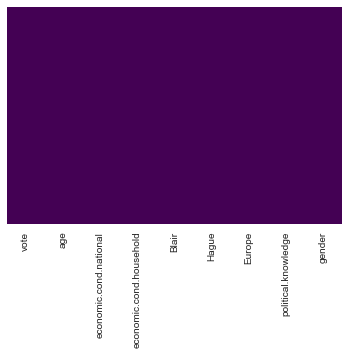

In [175]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

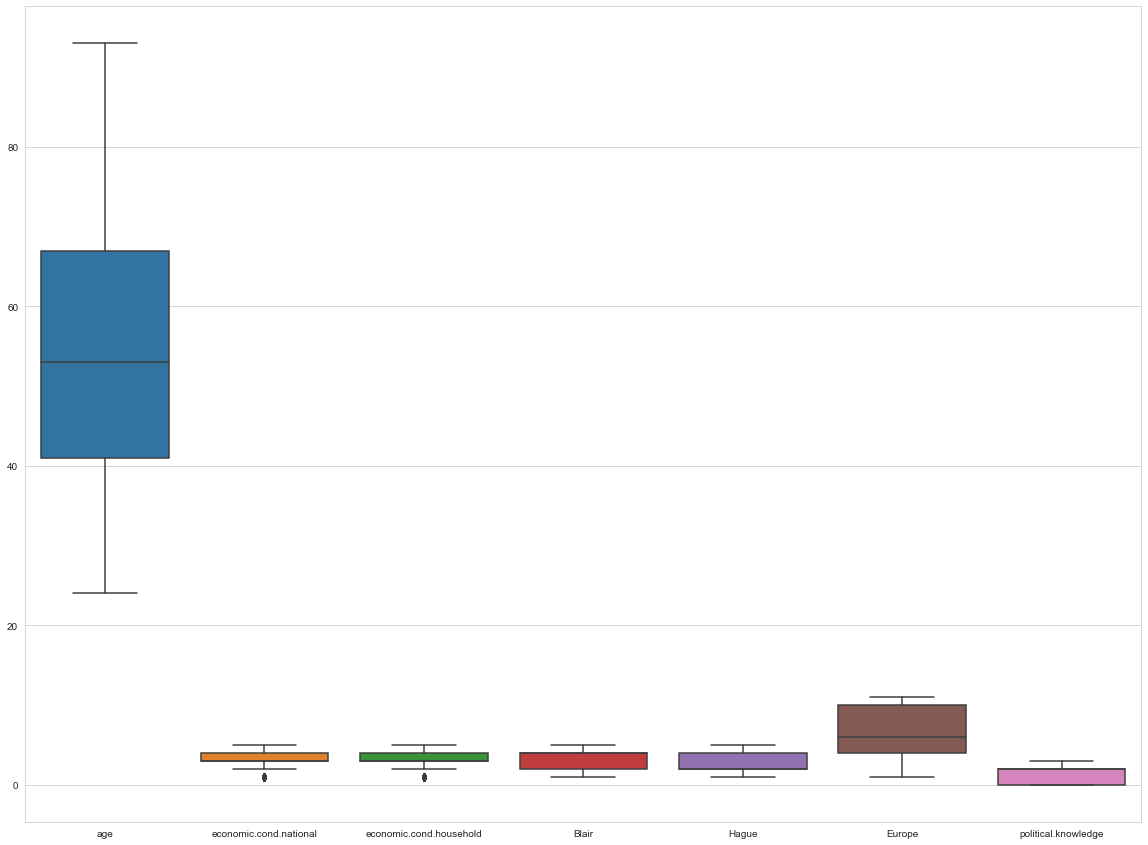

In [176]:
fig=plt.figure(figsize=(20,15))
sns.boxplot(data=data1)

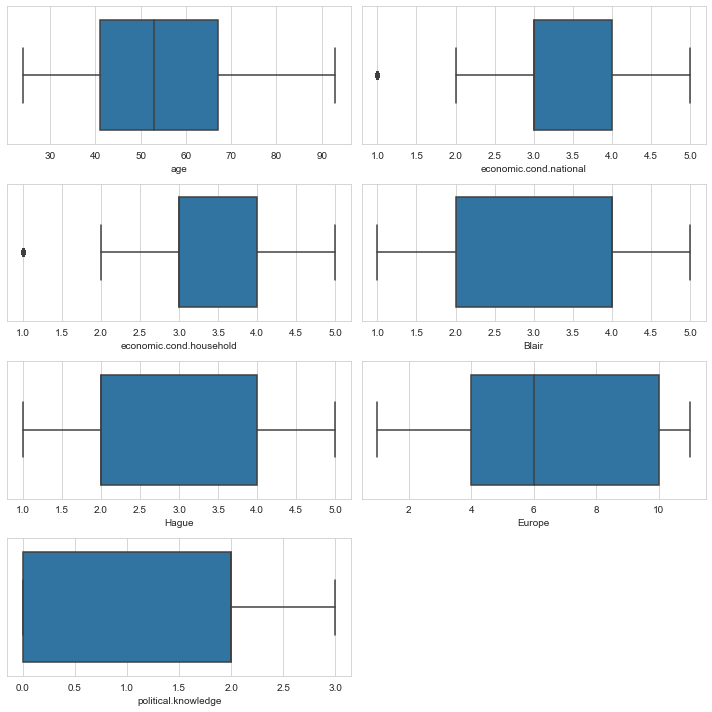

In [177]:
data_plot=data1[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [178]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [179]:
for col in ['economic.cond.national','economic.cond.household']:
    least,maximum=treat_outliers(data1[col])
    data1[col]=np.where(data1[col]<least,least,data1[col])
    data1[col]=np.where(data1[col]>maximum,maximum,data1[col])

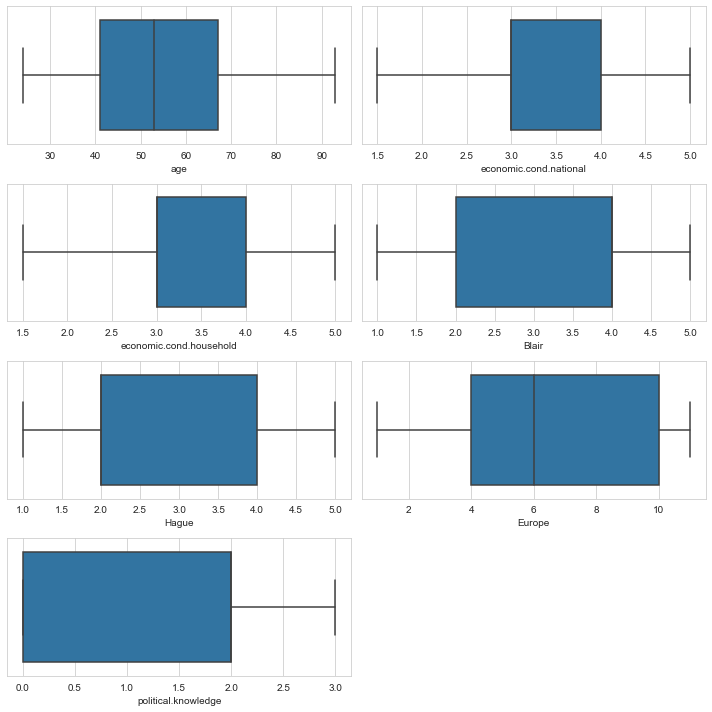

In [180]:
data_plot=data1[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

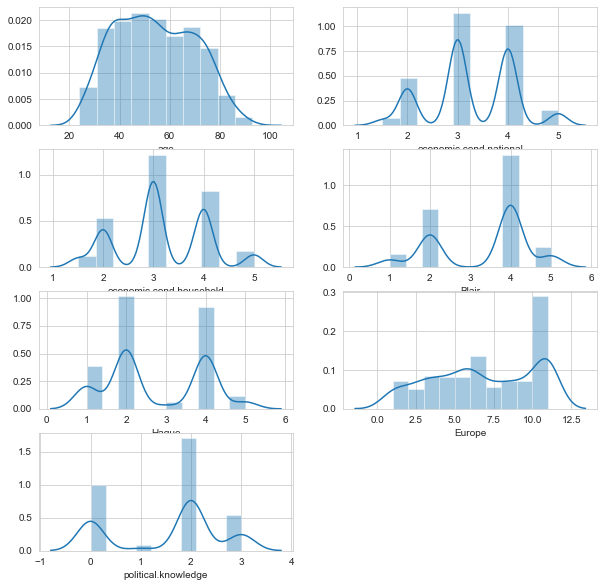

In [181]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.distplot(data1['age'],kde=True,bins=10)
plt.subplot(4,2,2)
sns.distplot(data1['economic.cond.national'],kde=True,bins=10)
plt.subplot(4,2,3)
sns.distplot(data1['economic.cond.household'],kde=True,bins=10)
plt.subplot(4,2,4)
sns.distplot(data1['Blair'],kde=True,bins=10)
plt.subplot(4,2,5)
sns.distplot(data1['Hague'],kde=True,bins=10)
plt.subplot(4,2,6)
sns.distplot(data1['Europe'],kde=True,bins=10)
plt.subplot(4,2,7)
sns.distplot(data1['political.knowledge'],kde=True,bins=10)

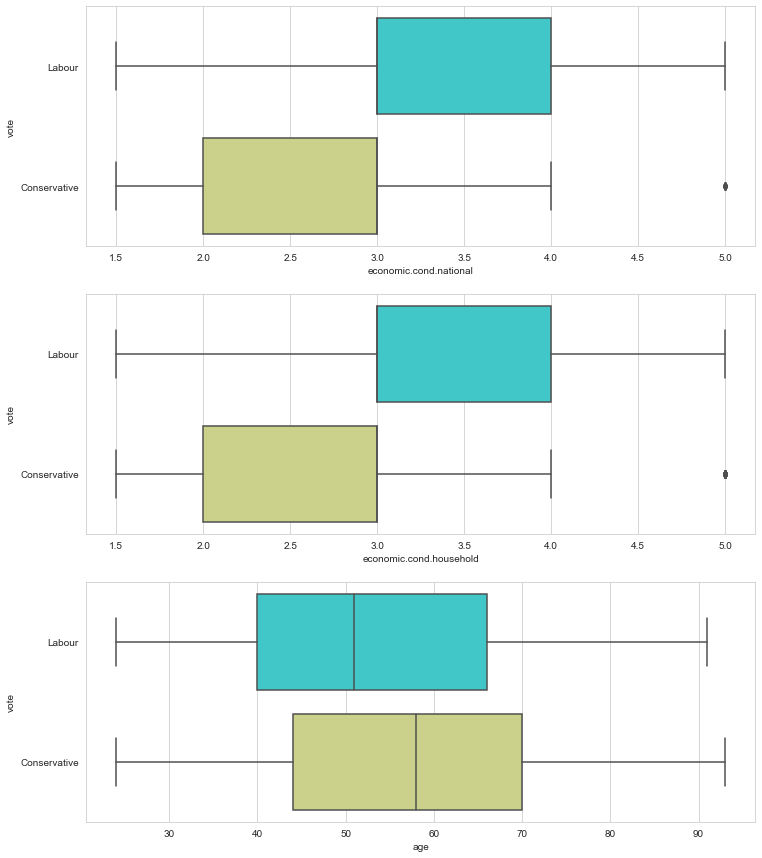

In [182]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
sns.boxplot(x='economic.cond.national',y='vote',data=data1,palette='rainbow')
plt.subplot(3,1,2)
sns.boxplot(x='economic.cond.household',y='vote',data=data1,palette='rainbow')
plt.subplot(3,1,3)
sns.boxplot(x='age',y='vote',data=data1,palette='rainbow')

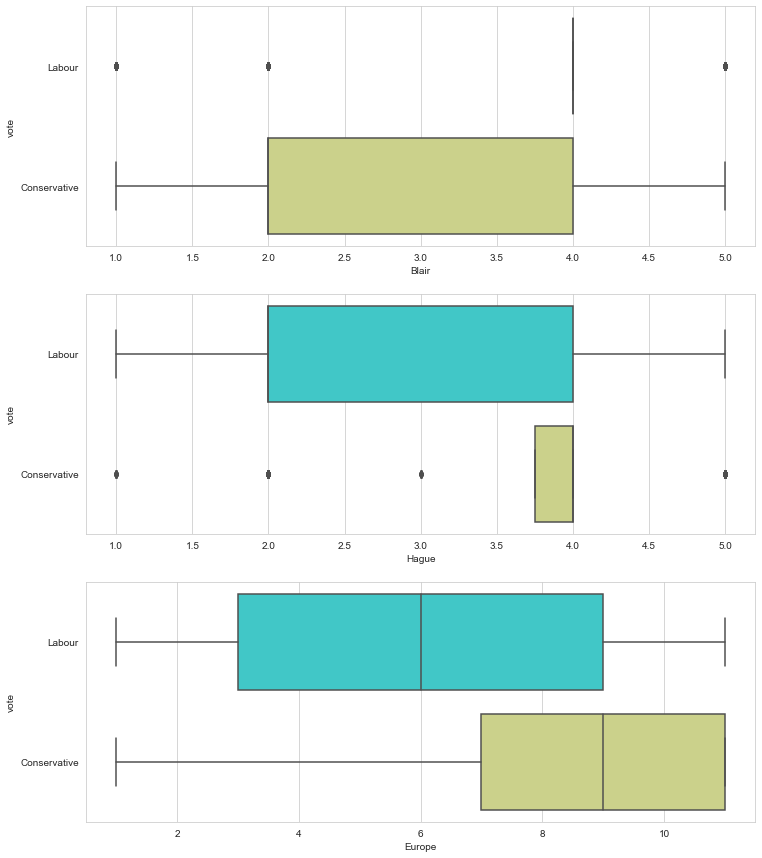

In [183]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
sns.boxplot(x='Blair',y='vote',data=data1,palette='rainbow')
plt.subplot(3,1,2)
sns.boxplot(x='Hague',y='vote',data=data1,palette='rainbow')
plt.subplot(3,1,3)
sns.boxplot(x='Europe',y='vote',data=data1,palette='rainbow')

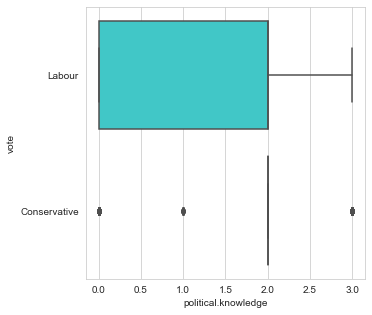

In [184]:
plt.figure(figsize=(5,5))
sns.boxplot(x='political.knowledge',y='vote',data=data1,palette='rainbow')

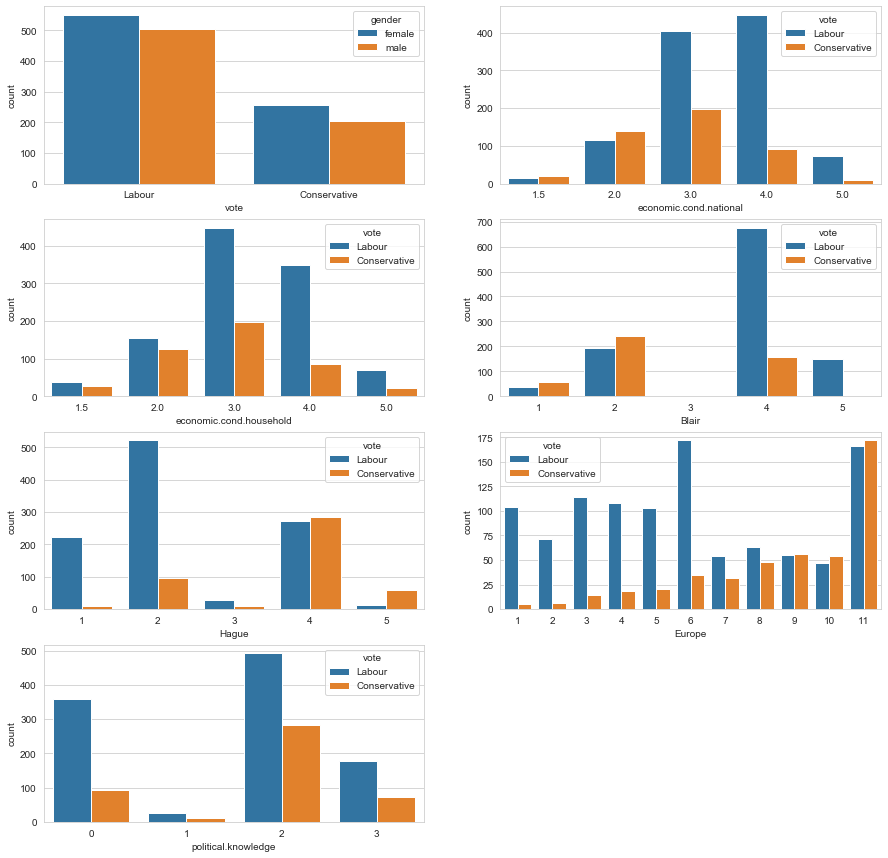

In [185]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.countplot(data1["vote"],hue=data1["gender"])
plt.subplot(4,2,2)
sns.countplot(data1["economic.cond.national"],hue=data1["vote"])
plt.subplot(4,2,3)
sns.countplot(data1["economic.cond.household"],hue=data1["vote"])
plt.subplot(4,2,4)
sns.countplot(data1["Blair"],hue=data1["vote"])
plt.subplot(4,2,5)
sns.countplot(data1["Hague"],hue=data1["vote"])
plt.subplot(4,2,6)
sns.countplot(data1["Europe"],hue=data1["vote"])
plt.subplot(4,2,7)
sns.countplot(data1["political.knowledge"],hue=data1["vote"])

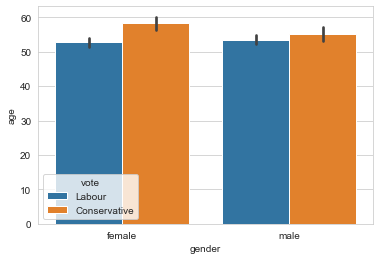

In [186]:
sns.barplot(x='gender',y='age',hue='vote',data=data1)

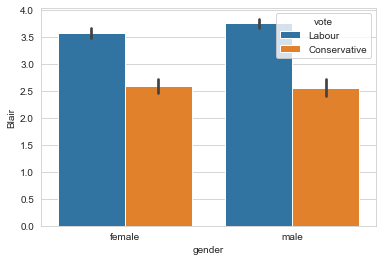

In [187]:
sns.barplot(x='gender',y='Blair',hue='vote',data=data1)

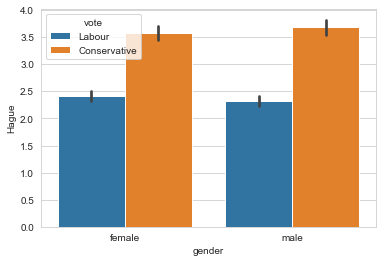

In [188]:
sns.barplot(x='gender',y='Hague',hue='vote',data=data1)

In [189]:
data1.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273
economic.cond.household,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521
Blair,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000


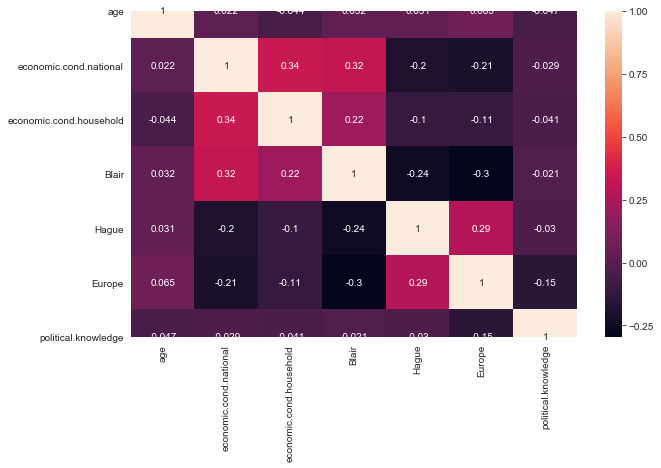

In [190]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),annot=True)

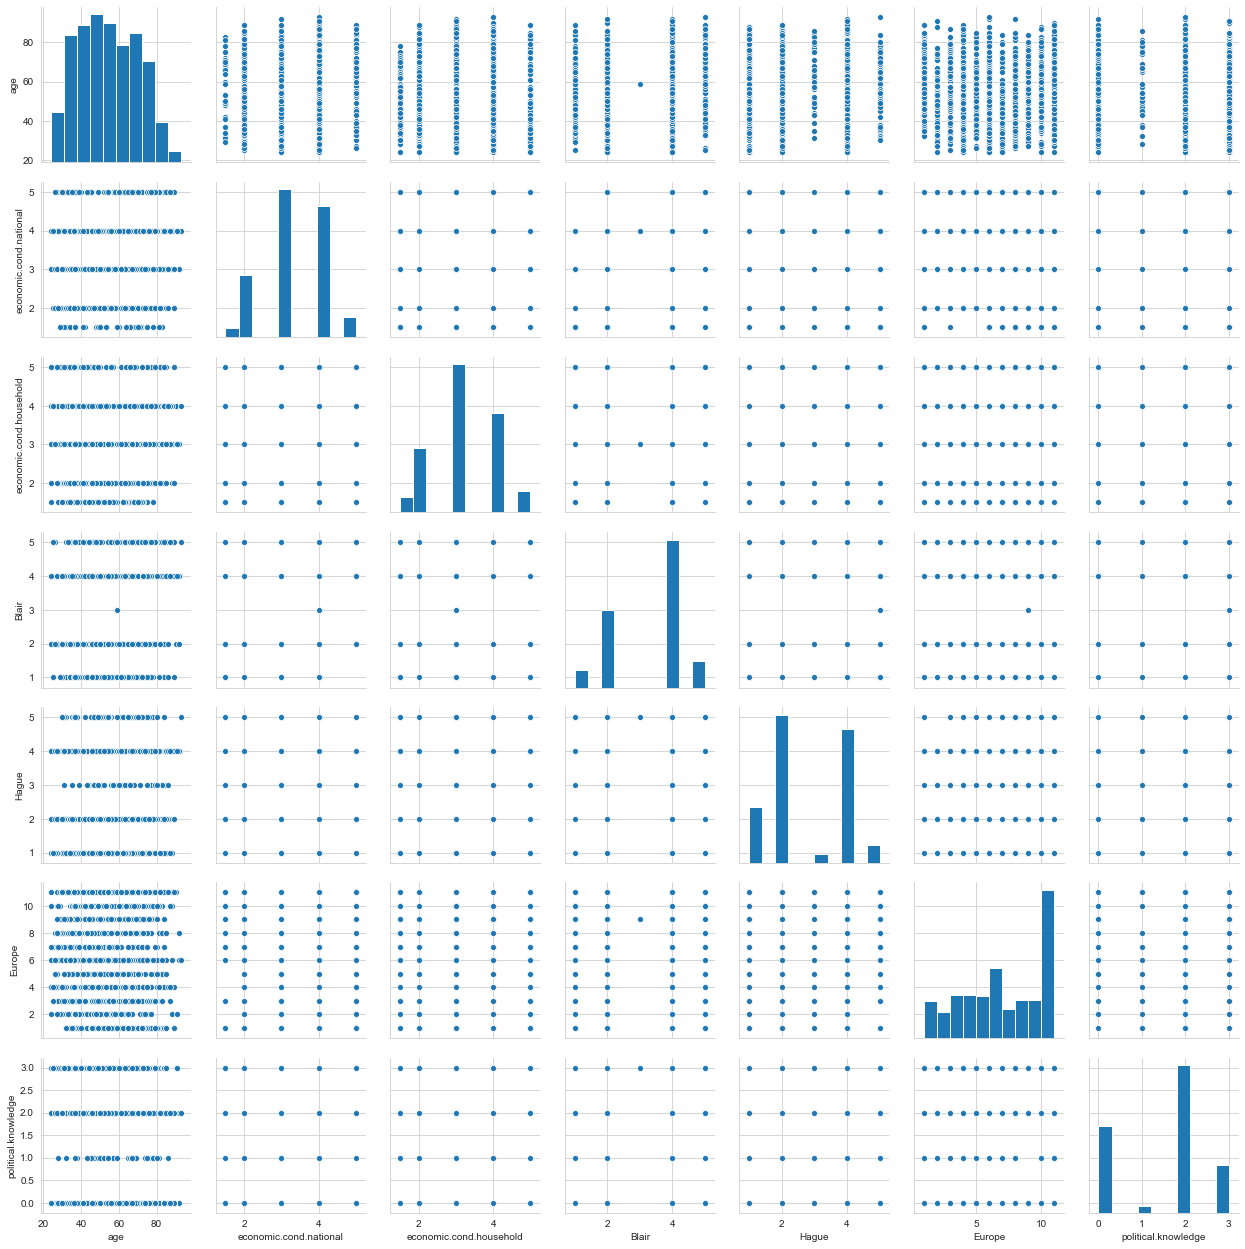

In [191]:
sns.pairplot(data=data1)

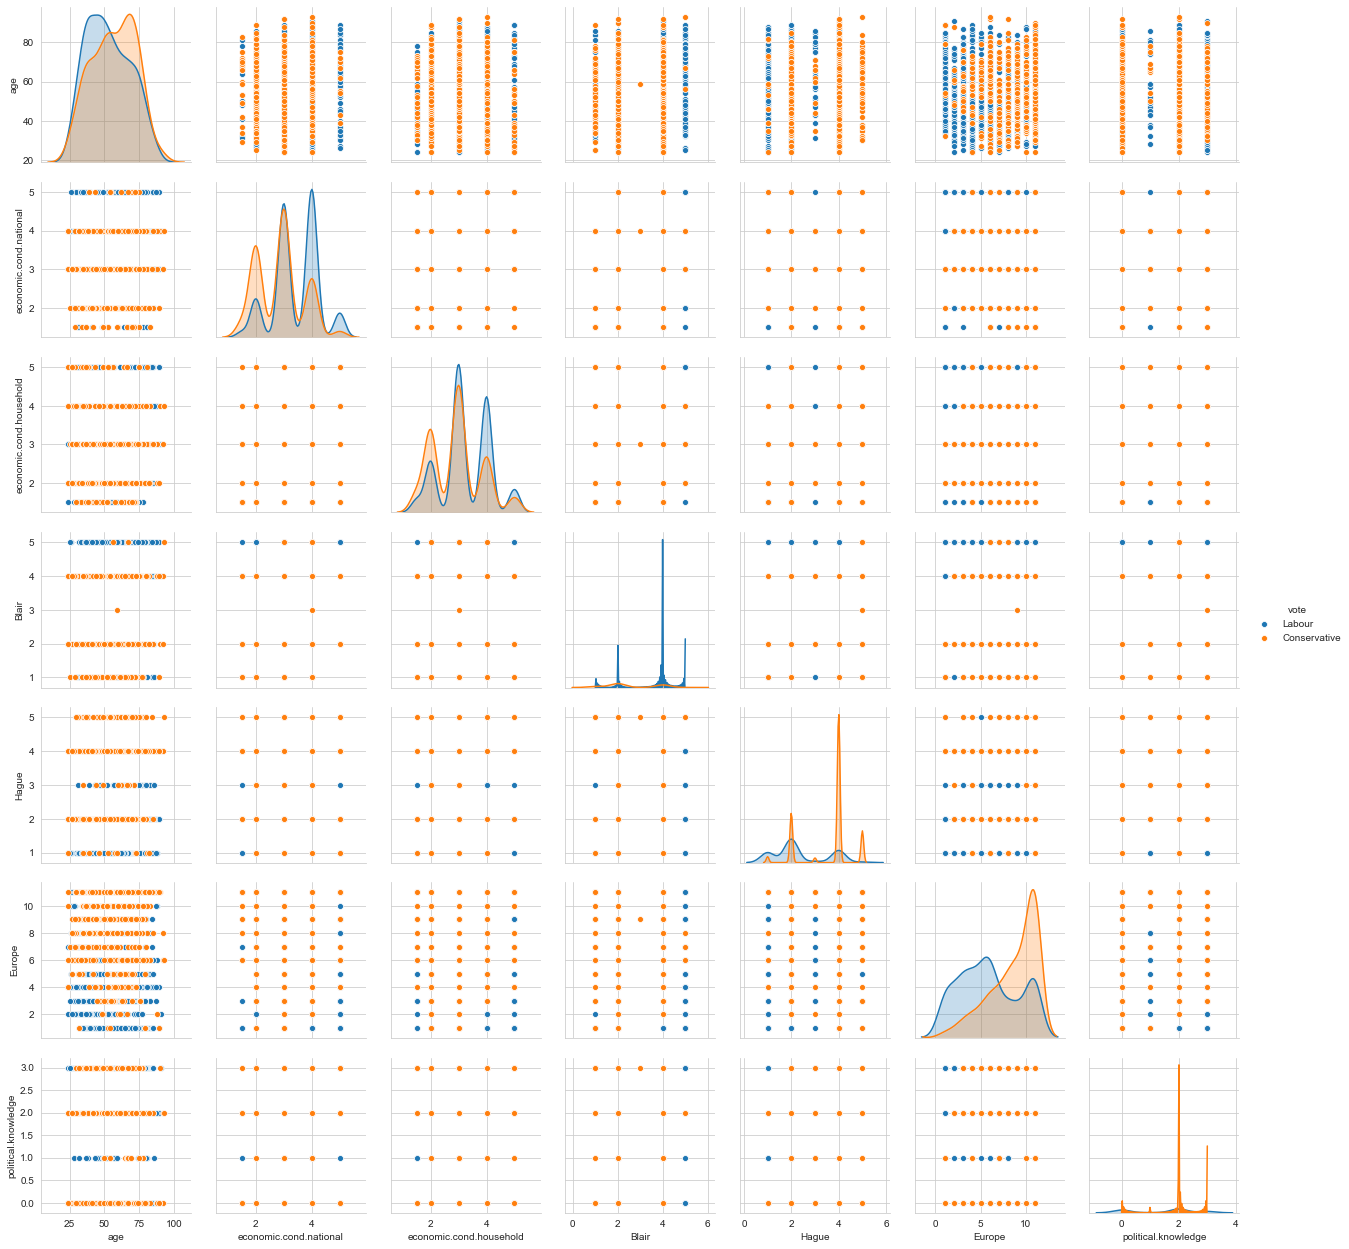

In [192]:
sns.pairplot(data=data1,hue='vote')

In [193]:
for feature in data1.columns:
    if data1[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(data1[feature].unique()))
        print(pd.Categorical(data1[feature].unique()).codes)
        data1[feature]=pd.Categorical(data1[feature]).codes



feature vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [194]:
data1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


In [195]:
X = data1.drop('vote', axis=1)
Y = data1[['vote']]

In [196]:
X.head(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1


In [197]:
Y.head(2)

,vote
0,1
1,1


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30 , random_state=7,stratify=Y)

In [200]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
Y_train_scaled = Y_train.apply(zscore)
Y_test_scaled = Y_test.apply(zscore)

In [201]:
X_train_scaled.head(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
474,-1.736106,-0.310679,-0.15872,-1.125462,1.00087,0.395929,0.435289,1.079493
635,0.179128,-1.496399,-0.15872,-1.125462,-0.61915,-0.812066,-1.401058,-0.926360


In [202]:
Y_train_scaled.head(2)

,vote
474,-1.514936
635,-1.514936


In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
Y_predict_trainLR = model.predict(X_train_scaled)
Y_predict_testLR=model.predict(X_test_scaled)
model_score_trainLR = model.score(X_train_scaled, Y_train)
model_score_testLR = model.score(X_test_scaled,Y_test)
print("train accuracy:")
print(model_score_trainLR)
print('\n')
print("test accuracy:")
print(model_score_testLR)
print('\n')
print("confusion matrix for train:")
print(metrics.confusion_matrix(Y_train, Y_predict_trainLR))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test, Y_predict_testLR))
print('\n')
print("classification report for train:")
print(metrics.classification_report(Y_train, Y_predict_trainLR))
print('\n')
print("classification report for test")
print(metrics.classification_report(Y_test, Y_predict_testLR))

train accuracy:
0.8388312912346843


test accuracy:
0.831140350877193


confusion matrix for train:
[[218 104]
 [ 67 672]]


confusion matrix for test:
[[ 92  46]
 [ 31 287]]


classification report for train:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



classification report for test
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AUC: 0.892


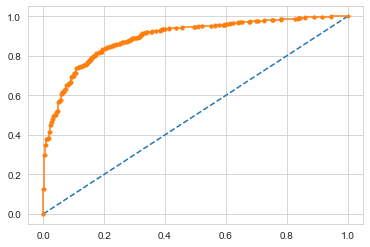

In [205]:
probs = model.predict_proba(X_train_scaled)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_train,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.883


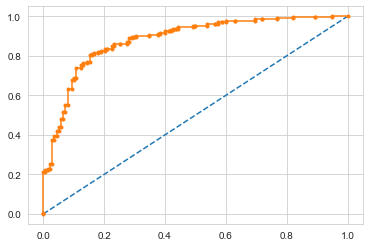

In [206]:
probs = model.predict_proba(X_test_scaled)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_test,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Regularised Logistic Regression Model

In [207]:
grid={'penalty':['l1','l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.01,0.001,0.0001,0.00001]}

In [208]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [209]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')

In [210]:
grid_search.fit(X_train_scaled, Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.87841747 0.87855307 0.87855307 0.87855307 0.87855307 0.87855307
 0.87855307 0.87855307 0.87855307 0.87855307 0.87855307 0.87855307
 0.87824543 0.87842887 0.87900196 0.87900196 0.87900196 0.87900196
 0.87900196 0.87900196 0.87900196 0.87900196 0.87900196 0.87900196]
  category=UserWarning
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1')

In [211]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [212]:
best_model = grid_search.best_estimator_

In [213]:
ytrain_predict_regLR = best_model.predict(X_train_scaled)
ytest_predict_regLR = best_model.predict(X_test_scaled)

In [214]:
ytrain_predict_prob_regLR=best_model.predict_proba(X_train_scaled)
pd.DataFrame(ytrain_predict_prob_regLR).head(2)

,0,1
0,0.617524,0.382476
1,0.163300,0.836700


In [215]:
ytest_predict_prob_regLR=best_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_regLR).head(2)

,0,1
0,0.067691,0.932309
1,0.038809,0.961191


In [216]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [217]:
print(classification_report(Y_train, ytrain_predict_regLR),'\n');

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 



In [218]:
print(classification_report(Y_test, ytest_predict_regLR),'\n');

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456
 



AUC: 0.892


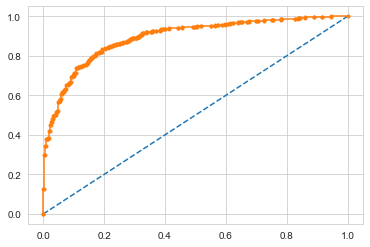

In [219]:
probs = best_model.predict_proba(X_train_scaled)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_train,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.883


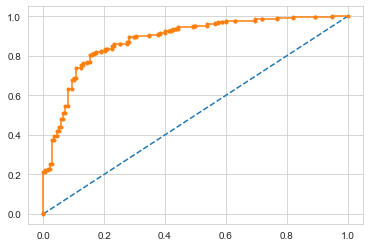

In [220]:
probs = best_model.predict_proba(X_test_scaled)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_test,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [221]:
print("Accuracy for training data set:",round(best_model.score(X_train_scaled, Y_train),3))
print("Accuracy for testing data set:",round(best_model.score(X_test_scaled,Y_test),3))

Accuracy for training data set: 0.839
Accuracy for testing data set: 0.831


In [222]:
print("confusion matrix for train:")
print(metrics.confusion_matrix(Y_train, ytrain_predict_regLR))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test, ytest_predict_regLR))
print('\n')

confusion matrix for train:
[[218 104]
 [ 67 672]]


confusion matrix for test:
[[ 92  46]
 [ 31 287]]




## Linear Discriminant Analysis

In [223]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_scaled,Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [224]:
pred_class_train = model.predict(X_train_scaled)

In [225]:
pred_class_test = model.predict(X_test_scaled)

In [226]:
print("confusion matrix for train:")
print('\n')
print(metrics.confusion_matrix(Y_train,pred_class_train))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test,pred_class_test))

confusion matrix for train:


[[220 102]
 [ 73 666]]


confusion matrix for test:
[[ 96  42]
 [ 31 287]]


In [227]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.68      0.72       322
           1       0.87      0.90      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.72       138
           1       0.87      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



In [228]:
pred_prob_train = model.predict_proba(X_train_scaled)

In [229]:
pred_prob_test = model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.892


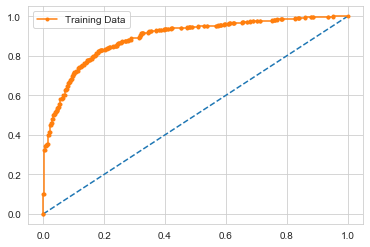

AUC for the Test Data: 0.884


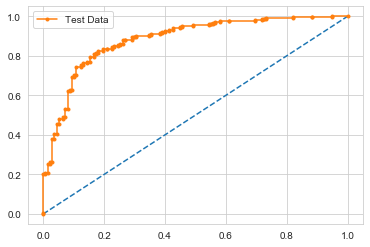

In [230]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [231]:
print("Accuracy for training data set:",model.score(X_train_scaled, Y_train))
print("Accuracy for testing data set:",model.score(X_test_scaled,Y_test))

Accuracy for training data set: 0.8350612629594723
Accuracy for testing data set: 0.8399122807017544


### Regularised Linear Discriminant Model

In [232]:
grid={'solver':['svd','lsqr','eigen'],
      'tol':[0.0001,0.00001,0.000001]}

In [233]:
model = LinearDiscriminantAnalysis()

In [234]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')

In [235]:
grid_search.fit(X_train_scaled, Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='f1')

In [236]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [237]:
best_model = grid_search.best_estimator_

In [238]:
ytrain_predict_regLDA = best_model.predict(X_train_scaled)
ytest_predict_regLDA = best_model.predict(X_test_scaled)

In [239]:
print(classification_report(Y_train, ytrain_predict_regLDA),'\n');
print(classification_report(Y_test, ytest_predict_regLDA),'\n');

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       322
           1       0.87      0.90      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

           0       0.76      0.70      0.72       138
           1       0.87      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



In [240]:
print("confusion matrix for train:")
print('\n')
print(metrics.confusion_matrix(Y_train,ytrain_predict_regLDA))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test,ytest_predict_regLDA))

confusion matrix for train:


[[220 102]
 [ 73 666]]


confusion matrix for test:
[[ 96  42]
 [ 31 287]]


In [241]:
pred_prob_train_regLDA = best_model.predict_proba(X_train_scaled)

In [242]:
pred_prob_test_regLDA = best_model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.892


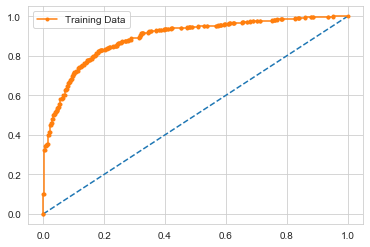

AUC for the Test Data: 0.884


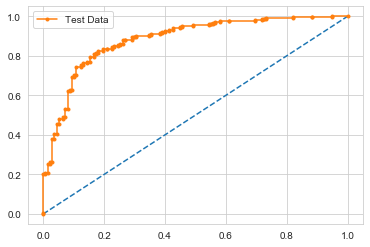

In [243]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train_regLDA[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train_regLDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test_regLDA[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test_regLDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [244]:
print("Accuracy for training data set:",best_model.score(X_train_scaled, Y_train))
print("Accuracy for testing data set:",best_model.score(X_test_scaled,Y_test))

Accuracy for training data set: 0.8350612629594723
Accuracy for testing data set: 0.8399122807017544


## K Nearest Nieghbor

### had copied data in case i will need to apply smote but as imbalance is not that considerable it is not required. smote is used if imbalance is less that 5% for minority class.

In [245]:
data_KNN_NB.drop_duplicates(inplace=True)
print(data_KNN_NB.shape)

(1517, 9)


In [246]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [247]:
for col in ['economic.cond.national','economic.cond.household']:
    least,maximum=treat_outliers(data_KNN_NB[col])
    data_KNN_NB[col]=np.where(data_KNN_NB[col]<least,least,data_KNN_NB[col])
    data_KNN_NB[col]=np.where(data_KNN_NB[col]>maximum,maximum,data_KNN_NB[col])

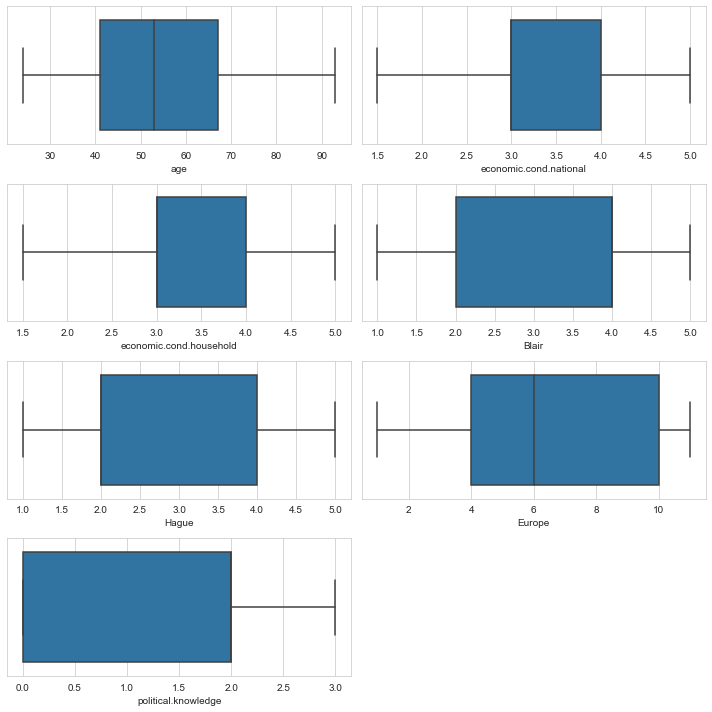

In [248]:
data_plot=data_KNN_NB[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [249]:
for feature in data_KNN_NB.columns:
    if data_KNN_NB[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(data_KNN_NB[feature].unique()))
        print(pd.Categorical(data_KNN_NB[feature].unique()).codes)
        data_KNN_NB[feature]=pd.Categorical(data_KNN_NB[feature]).codes



feature vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [250]:
data_KNN_NB.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1


In [251]:
X1 = data_KNN_NB.drop('vote', axis=1)
Y2 = data_KNN_NB[['vote']]

In [252]:
X_train,X_test,Y_train,Y_test = train_test_split(X1, Y2, test_size=0.30 , random_state=1)

In [253]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
Y_train_scaled = Y_train.apply(zscore)
Y_test_scaled = Y_test.apply(zscore)

In [254]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [255]:
Y_train_predict_scaled = KNN_model.predict(X_train_scaled)

In [256]:
Y_test_predict_scaled = KNN_model.predict(X_test_scaled)

In [257]:
model_score_train = KNN_model.score(X_train_scaled, Y_train)
print(model_score_train)

0.8548539114043355


In [258]:
model_score_test = KNN_model.score(X_test_scaled, Y_test)
print(model_score_test)

0.8223684210526315


In [259]:
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaled))
print('\n')
print(metrics.classification_report(Y_train, Y_train_predict_scaled))

[[216  91]
 [ 63 691]]


              precision    recall  f1-score   support

           0       0.77      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [260]:
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaled))
print('\n')
print(metrics.classification_report(Y_test, Y_test_predict_scaled))

[[104  49]
 [ 32 271]]


              precision    recall  f1-score   support

           0       0.76      0.68      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [261]:
print(Y_test.shape)
print(Y_test_predict_scaled.shape)

(456, 1)
(456,)


In [262]:
print(Y_train.shape)
print(Y_train_predict_scaled.shape)

(1061, 1)
(1061,)


In [263]:
# empty list that will hold accuracy scores
accuracy_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, Y_test)
    accuracy_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in accuracy_scores]
MCE

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1

[0.2192982456140351,
 0.21052631578947367,
 0.17763157894736847,
 0.17324561403508776,
 0.17324561403508776,
 0.16666666666666663,
 0.17324561403508776,
 0.16666666666666663,
 0.17324561403508776,
 0.17543859649122806]

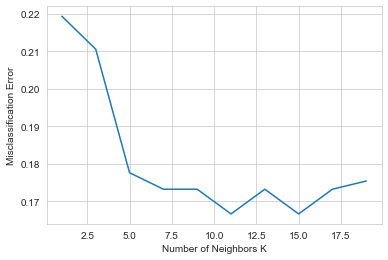

In [264]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [265]:
KNN_model_rgl=KNeighborsClassifier(n_neighbors=15)
KNN_model_rgl.fit(X_train_scaled,Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [266]:
Y_train_predict_scaled_rgl = KNN_model_rgl.predict(X_train_scaled)
Y_test_predict_scaled_rgl = KNN_model_rgl.predict(X_test_scaled)

In [267]:
model_score_train_rgl = KNN_model_rgl.score(X_train_scaled, Y_train)
print(model_score_train_rgl)
print('\n')
model_score_test_rgl = KNN_model_rgl.score(X_test_scaled, Y_test)
print(model_score_test_rgl)

0.8369462770970783


0.8333333333333334


In [268]:
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaled_rgl))
print('\n')
print(metrics.classification_report(Y_train, Y_train_predict_scaled_rgl))

[[205 102]
 [ 71 683]]


              precision    recall  f1-score   support

           0       0.74      0.67      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [269]:
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaled_rgl))
print('\n')
print(metrics.classification_report(Y_test, Y_test_predict_scaled_rgl))

[[100  53]
 [ 23 280]]


              precision    recall  f1-score   support

           0       0.81      0.65      0.72       153
           1       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [270]:
KNN_model_rgl=KNeighborsClassifier(n_neighbors=11)
KNN_model_rgl.fit(X_train_scaled,Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [271]:
Y_train_predict_scaled_rgl = KNN_model_rgl.predict(X_train_scaled)
Y_test_predict_scaled_rgl = KNN_model_rgl.predict(X_test_scaled)

In [272]:
model_score_train_rgl = KNN_model_rgl.score(X_train_scaled, Y_train)
print(model_score_train_rgl)
print('\n')
model_score_test_rgl = KNN_model_rgl.score(X_test_scaled, Y_test)
print(model_score_test_rgl)

0.8416588124410933


0.8333333333333334


In [273]:
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaled_rgl))
print('\n')
print(metrics.classification_report(Y_train, Y_train_predict_scaled_rgl))

[[204 103]
 [ 65 689]]


              precision    recall  f1-score   support

           0       0.76      0.66      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [274]:
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaled_rgl))
print('\n')
print(metrics.classification_report(Y_test, Y_test_predict_scaled_rgl))

[[104  49]
 [ 27 276]]


              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [275]:
prob_train_regKNN = KNN_model_rgl.predict_proba(X_train_scaled)
prob_test_regKNN = KNN_model_rgl.predict_proba(X_test_scaled)

AUC for the Training Data: 0.910


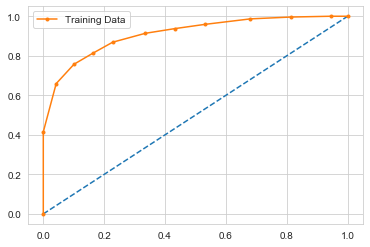

AUC for the Test Data: 0.892


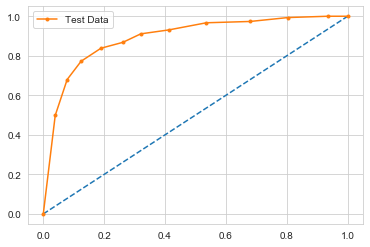

In [276]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,prob_train_regKNN[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,prob_train_regKNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,prob_test_regKNN[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,prob_test_regKNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Naive Bayes

In [277]:
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [278]:
Y_train_predict_scaledNB = NB_model.predict(X_train_scaled)
Y_test_predict_scaledNB = NB_model.predict(X_test_scaled)

In [279]:
model_score_scaled_trainNB = NB_model.score(X_train_scaled,Y_train)                      ## Accuracy
print(model_score_scaled_trainNB)
print('\n')
model_score_scaled_testNB = NB_model.score(X_test_scaled,Y_test)                      ## Accuracy
print(model_score_scaled_testNB)

0.8341187558906692


0.8245614035087719


In [280]:
print("Confusion matrix and Classification Report on Training Data set :")
print('\n')
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaledNB))          ## confusion_matrix
print(metrics.classification_report(Y_train, Y_train_predict_scaledNB))     ## classification_report
print('\n')
print("Confusion matrix and Classification Report on Test Data set :")
print('\n')
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaledNB))            ## confusion_matrix
print(metrics.classification_report(Y_test, Y_test_predict_scaledNB))      ## classification_report

Confusion matrix and Classification Report on Training Data set :


[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



Confusion matrix and Classification Report on Test Data set :


[[108  45]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [281]:
pred_prob_train_NB = NB_model.predict_proba(X_train_scaled)
pred_prob_test_NB = NB_model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.889


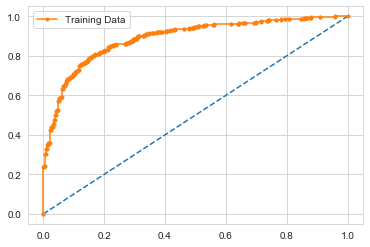

AUC for the Test Data: 0.878


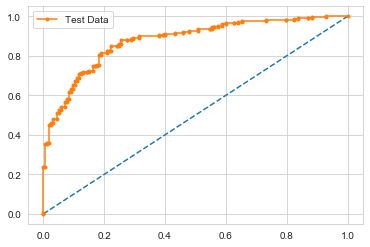

In [282]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train_NB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test_NB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boosting

In [283]:
from sklearn.ensemble import AdaBoostClassifier

In [284]:
AdaBoost_model = AdaBoostClassifier(n_estimators = 100,random_state =1)

In [285]:
AdaBoost_model.fit(X_train_scaled, Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [286]:
Y_train_predict_scaledADB = AdaBoost_model.predict(X_train_scaled)
Y_test_predict_scaledADB = AdaBoost_model.predict(X_test_scaled)

In [287]:
model_scoreADB_train = AdaBoost_model.score(X_train_scaled,Y_train)
print(model_scoreADB_train)
print('\n')
model_scoreADB_test = AdaBoost_model.score(X_test_scaled,Y_test)
print(model_scoreADB_test)

0.8501413760603205


0.8245614035087719


In [288]:
print("Confusion matrix and Classification Report on Training Data set :")
print('\n')
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaledADB))          ## confusion_matrix
print(metrics.classification_report(Y_train, Y_train_predict_scaledADB))     ## classification_report
print('\n')
print("Confusion matrix and Classification Report on Test Data set :")
print('\n')
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaledADB))            ## confusion_matrix
print(metrics.classification_report(Y_test, Y_test_predict_scaledADB))      ## classification_report

Confusion matrix and Classification Report on Training Data set :


[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Confusion matrix and Classification Report on Test Data set :


[[106  47]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [289]:
pred_prob_train_ADB = AdaBoost_model.predict_proba(X_train_scaled)
pred_prob_test_ADB = AdaBoost_model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.915


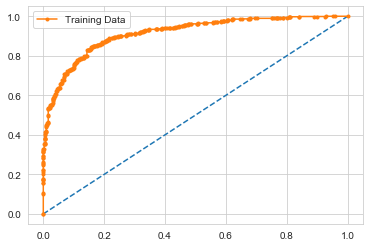

AUC for the Test Data: 0.881


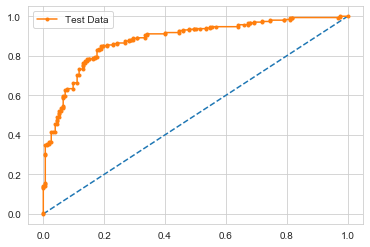

In [290]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train_ADB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test_ADB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting

In [291]:
from sklearn.ensemble import GradientBoostingClassifier

In [292]:
GradientBoost_model = GradientBoostingClassifier(random_state = 1)

In [293]:
GradientBoost_model = GradientBoost_model.fit(X_train_scaled,Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [294]:
Y_train_predict_scaledGRDB = GradientBoost_model.predict(X_train_scaled)
Y_test_predict_scaledGRDB = GradientBoost_model.predict(X_test_scaled)

In [295]:
model_scoreGRDB_train = GradientBoost_model.score(X_train_scaled,Y_train)
print(model_scoreGRDB_train)
print('\n')
model_scoreGRDB_test = GradientBoost_model.score(X_test_scaled,Y_test)
print(model_scoreGRDB_test)

0.8925541941564562


0.8355263157894737


In [296]:
print("Confusion matrix and Classification Report on Training Data set :")
print('\n')
print(metrics.confusion_matrix(Y_train, Y_train_predict_scaledGRDB))          ## confusion_matrix
print(metrics.classification_report(Y_train, Y_train_predict_scaledGRDB))     ## classification_report
print('\n')
print("Confusion matrix and Classification Report on Test Data set :")
print('\n')
print(metrics.confusion_matrix(Y_test, Y_test_predict_scaledGRDB))            ## confusion_matrix
print(metrics.classification_report(Y_test, Y_test_predict_scaledGRDB))      ## classification_report

Confusion matrix and Classification Report on Training Data set :


[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



Confusion matrix and Classification Report on Test Data set :


[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [297]:
pred_prob_train_GRDB = GradientBoost_model.predict_proba(X_train_scaled)
pred_prob_test_GRDB = GradientBoost_model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.915


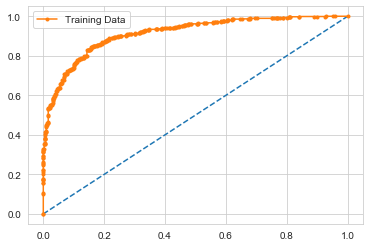

AUC for the Test Data: 0.881


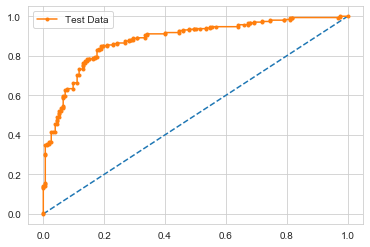

In [298]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train_ADB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test_ADB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Bagging (Random Forest)

In [310]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=7)
rfcl = rfcl.fit(X_train_scaled, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [311]:
Y_predict_train = rfcl.predict(X_train_scaled)
Y_predict_test = rfcl.predict(X_test_scaled)
print(rfcl.score(X_train_scaled,Y_train))
print(rfcl.score(X_test_scaled, Y_test))

1.0
0.8223684210526315


In [312]:
print("Confusion matrix and Classification Report on Training Data set :")
print('\n')
print(metrics.confusion_matrix(Y_train, Y_predict_train))          ## confusion_matrix
print(metrics.classification_report(Y_train, Y_predict_train))     ## classification_report
print('\n')
print("Confusion matrix and Classification Report on Test Data set :")
print('\n')
print(metrics.confusion_matrix(Y_test, Y_predict_test))            ## confusion_matrix
print(metrics.classification_report(Y_test, Y_predict_test))      ## classification_report

Confusion matrix and Classification Report on Training Data set :


[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



Confusion matrix and Classification Report on Test Data set :


[[109  44]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [313]:
pred_prob_train = rfcl.predict_proba(X_train_scaled)
pred_prob_test = rfcl.predict_proba(X_test_scaled)

AUC for the Training Data: 1.000


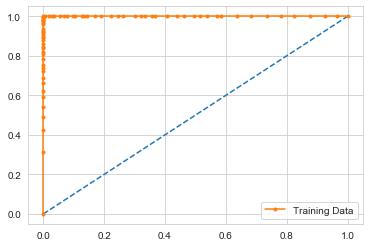

AUC for the Test Data: 0.887


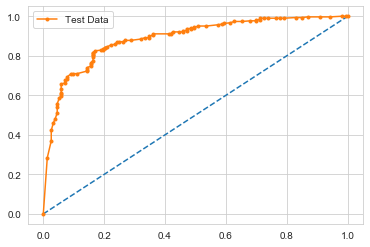

In [314]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [317]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_scaled, Y_train)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [318]:
y_train_predict = Bagging_model.predict(X_train_scaled)
model_score =Bagging_model.score(X_train_scaled, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.9688972667295005
[[279  28]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [319]:
y_test_predict = Bagging_model.predict(X_test_scaled)
model_score = Bagging_model.score(X_test_scaled, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.8267543859649122
[[103  50]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [320]:
pred_prob_train = Bagging_model.predict_proba(X_train_scaled)
pred_prob_test = Bagging_model.predict_proba(X_test_scaled)

AUC for the Training Data: 0.997


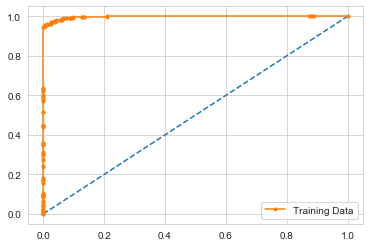

AUC for the Test Data: 0.899


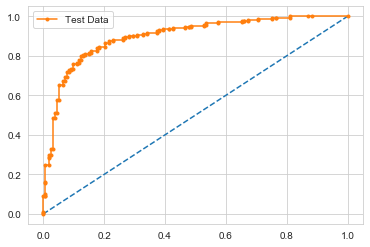

In [321]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Problem Set 2 :

### In this particular project, we are going to work on the inaugural corpora from the nltk in python.We will be looking at the following speeches of the Presidents of United States of America.

In [322]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [323]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [324]:
Roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
Kennedy_speech = inaugural.raw('1961-Kennedy.txt')
Nixon_speech = inaugural.raw('1973-Nixon.txt')

In [325]:
Roosevelt = list(inaugural.words('1941-Roosevelt.txt'))
len(Roosevelt)                 

1536

In [326]:
Kennedy = list(inaugural.words('1961-Kennedy.txt'))
len(Kennedy)  

1546

In [327]:
Nixon = list(inaugural.words('1973-Nixon.txt'))
len(Nixon)  

2028

In [328]:
speech=pd.DataFrame({"Speech":[Roosevelt_speech,Kennedy_speech,Nixon_speech],"Sentiment":["Positive","Negative","Positive"]})

In [329]:
speech

,Speech,Sentiment
0,On each national day of inauguration since 178...,Positive
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Negative
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Positive


In [330]:
all_Words=[x for x in pd.Series(' '.join(speech['Speech']).split())] 
all_Words

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789,',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States.',
 'In',
 "Washington's",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation.',
 'In',
 "Lincoln's",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time,',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings,',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'history',
 'has',
 'been,',
 'and',
 'to',
 'redisc

In [331]:
nltk.FreqDist(all_Words).most_common(20)

[('the', 267),
 ('of', 214),
 ('to', 137),
 ('and', 125),
 ('in', 108),
 ('a', 91),
 ('we', 87),
 ('that', 72),
 ('our', 66),
 ('--', 63),
 ('for', 51),
 ('is', 44),
 ('us', 44),
 ('not', 44),
 ('by', 33),
 ('this', 32),
 ('as', 30),
 ('have', 29),
 ('be', 28),
 ('from', 26)]

In [332]:
speech['sent_count'] = [len(x.split(".")) for x in speech['Speech'].tolist()]
speech[['Speech','sent_count']]

,Speech,sent_count
0,On each national day of inauguration since 178...,69
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",70


In [333]:
all_Sent=[x for x in pd.Series(' '.join(speech['Speech']).split('.'))] 
all_Sent

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States',
 "\n\nIn Washington's day the task of the people was to create and weld together a nation",
 "\n\nIn Lincoln's day the task of the people was to preserve that Nation from disruption from within",
 '\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without',
 '\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be',
 ' If we do not, we risk the real peril of inaction',
 '\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit',
 ' The life of a man is three-score years and ten: a little more, a little less',
 ' The life of a nation is the fullness of the measure of its will to live',
 '\n\nThere are men who doubt this',
 

In [334]:
len(all_Sent)

193

In [335]:
speech['char_count'] = speech['Speech'].str.len()
speech[['Speech','char_count']]

,Speech,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [336]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech['Speech'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Speech, dtype: object

In [337]:
speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
speech['Speech'].head()

0    On national day inauguration since 1789 people...
1    Vice President Johnson Mr Speaker Mr Chief Jus...
2    Mr Vice President Mr Speaker Mr Chief Justice ...
Name: Speech, dtype: object

In [338]:
freq = pd.Series(' '.join(speech['Speech']).split()).value_counts()[:10]
freq

us         46
world      25
new        25
peace      23
America    22
We         22
Let        21
I          18
let        18
The        16
dtype: int64

In [339]:
P1=pd.DataFrame({"Speech":[Roosevelt_speech],"Sentiment":["Positive"]})
P1

,Speech,Sentiment
0,On each national day of inauguration since 178...,Positive


In [340]:
P1['Speech'] = P1['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
P1['Speech']

0    on each national day of inauguration since 178...
Name: Speech, dtype: object

In [341]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
P1['Speech'] = P1['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
P1['Speech']

0    national day inauguration since 1789, people r...
Name: Speech, dtype: object

In [342]:
P1['Speech'] = P1['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
P1['Speech']

0    national day inauguration since 1789 people re...
Name: Speech, dtype: object

In [343]:
freq = pd.Series(' '.join(P1['Speech']).split()).value_counts()[:20]
freq

nation        11
know          10
spirit         9
democracy      9
life           8
us             8
people         7
america        7
years          6
freedom        6
speaks         5
mind           5
human          5
day            4
government     4
new            4
men            4
states         4
faith          4
something      4
dtype: int64

In [344]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["know","us","life","must","nations", "body", "day", "men"])

In [345]:
corpus1 = P1['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus1

0    national inauguration since 1789 people renewe...
Name: Speech, dtype: object

In [346]:
word_cloud = ' '.join(corpus1)

Word Cloud for Roosevelt Speech (after cleaning)!!


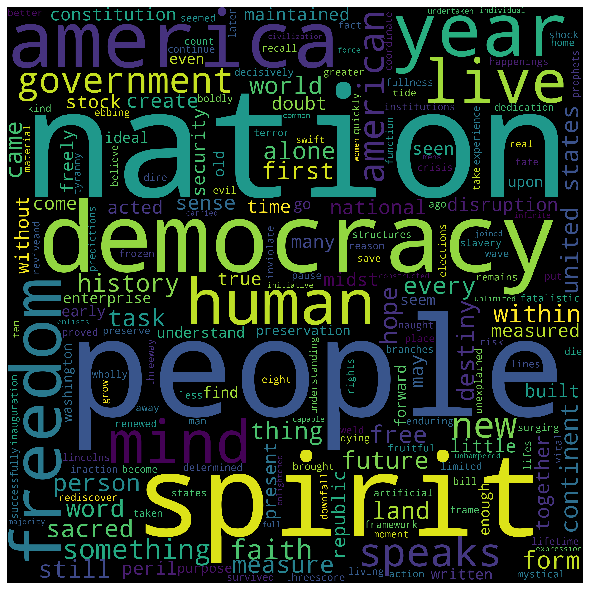

In [347]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()

# Kennedy Speech

In [348]:
P2=pd.DataFrame({"Speech":[Kennedy_speech],"Sentiment":["Positive"]})
P2

,Speech,Sentiment
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Positive


In [349]:
P2['Speech'] = P2['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
P2['Speech'].head()

0    vice president johnson, mr. speaker, mr. chief...
Name: Speech, dtype: object

In [350]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
P2['Speech'] = P2['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
P2['Speech']

0    vice president johnson, mr. speaker, mr. chief...
Name: Speech, dtype: object

In [351]:
P2['Speech'] = P2['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
P2['Speech']

0    vice president johnson mr speaker mr chief jus...
Name: Speech, dtype: object

In [352]:
freq = pd.Series(' '.join(P2['Speech']).split()).value_counts()[:30]
freq

let          16
us           12
world         8
sides         8
pledge        7
new           7
nations       5
ask           5
power         5
free          5
shall         5
citizens      5
call          4
hope          4
freedom       4
fellow        4
americans     4
peace         4
arms          4
president     4
war           4
help          4
always        4
country       4
cannot        4
man           4
first         4
poverty       3
dare          3
final         3
dtype: int64

In [353]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["us","the","of","to","and","--", "our", "that", "not","let","are","can","be","do","or","all","which","by","from"])

In [354]:
corpus2 = P2['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    vice president johnson mr speaker mr chief jus...
Name: Speech, dtype: object

In [355]:
word_cloud = ' '.join(corpus2)

Word Cloud for Kennedy Speech (after cleaning)!!


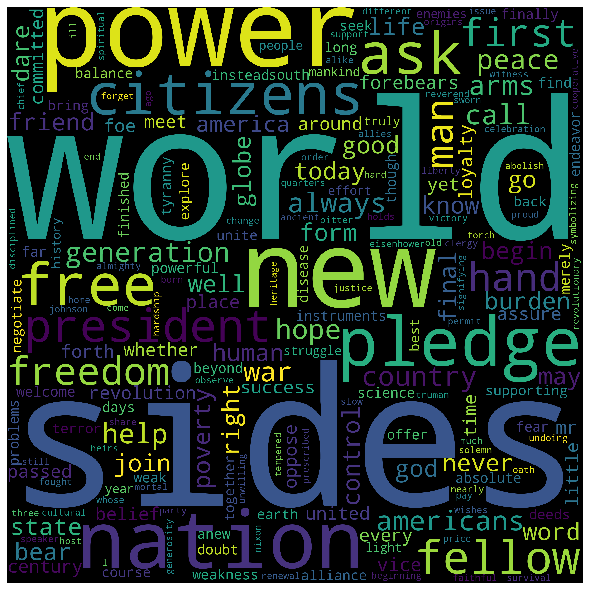

In [356]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

# Nixon Speech

In [357]:
P3=pd.DataFrame({"Speech":[Nixon_speech],"Sentiment":["Positive"]})
P3

,Speech,Sentiment
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Positive


In [358]:
P3['Speech'] = P3['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
P3['Speech']

0    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [359]:
P3['Speech'] = P3['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
P3['Speech']

0    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [360]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
P3['Speech'] = P3['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
P3['Speech']

0    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [361]:
freq = pd.Series(' '.join(P3['Speech']).split()).value_counts()[:30]
freq

us                  26
let                 22
peace               19
world               16
new                 15
america             13
responsibility      11
government          10
great                9
home                 9
americas             8
abroad               8
nation               8
shall                7
make                 7
years                7
role                 7
policies             7
together             7
history              7
every                7
better               7
help                 6
people               6
time                 6
right                6
nations              6
responsibilities     5
others               5
progress             5
dtype: int64

In [362]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["shall","every","new","america","us", "let", "role", "act"])

In [363]:
corpus3 = P3['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus3

0    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [364]:
word_cloud = ''.join(corpus3)

Word Cloud for Nixon Speech (after cleaning)!!


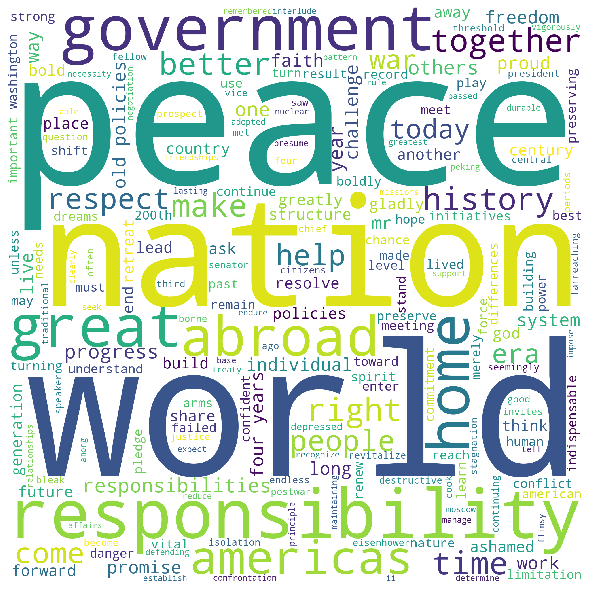

In [365]:
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(word_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()